In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [13]:
path_to_save = "/scratch/cinthiasouza/mv-text-summarizer/notebook/sv_nestimators_10_depth_2"
embed_path = 'embed_bert'
sections=['introduction', 'materials', 'conclusion', 'concat']
name_models = ['knn', 'ab', 'rf', 'cb', 'gb']

columns = list(range(0, 383))
columns = list(map(str, columns))

models = {}

for section in sections:
    
    aux_models = {}
    for name_model in name_models:
    
        model = joblib.load('{}/{}_{}.pkl'.format(path_to_save, name_model, section))
        
        aux_models[name_model]=model
    
    models[section] = aux_models

In [14]:
forest = models['introduction']['rf']

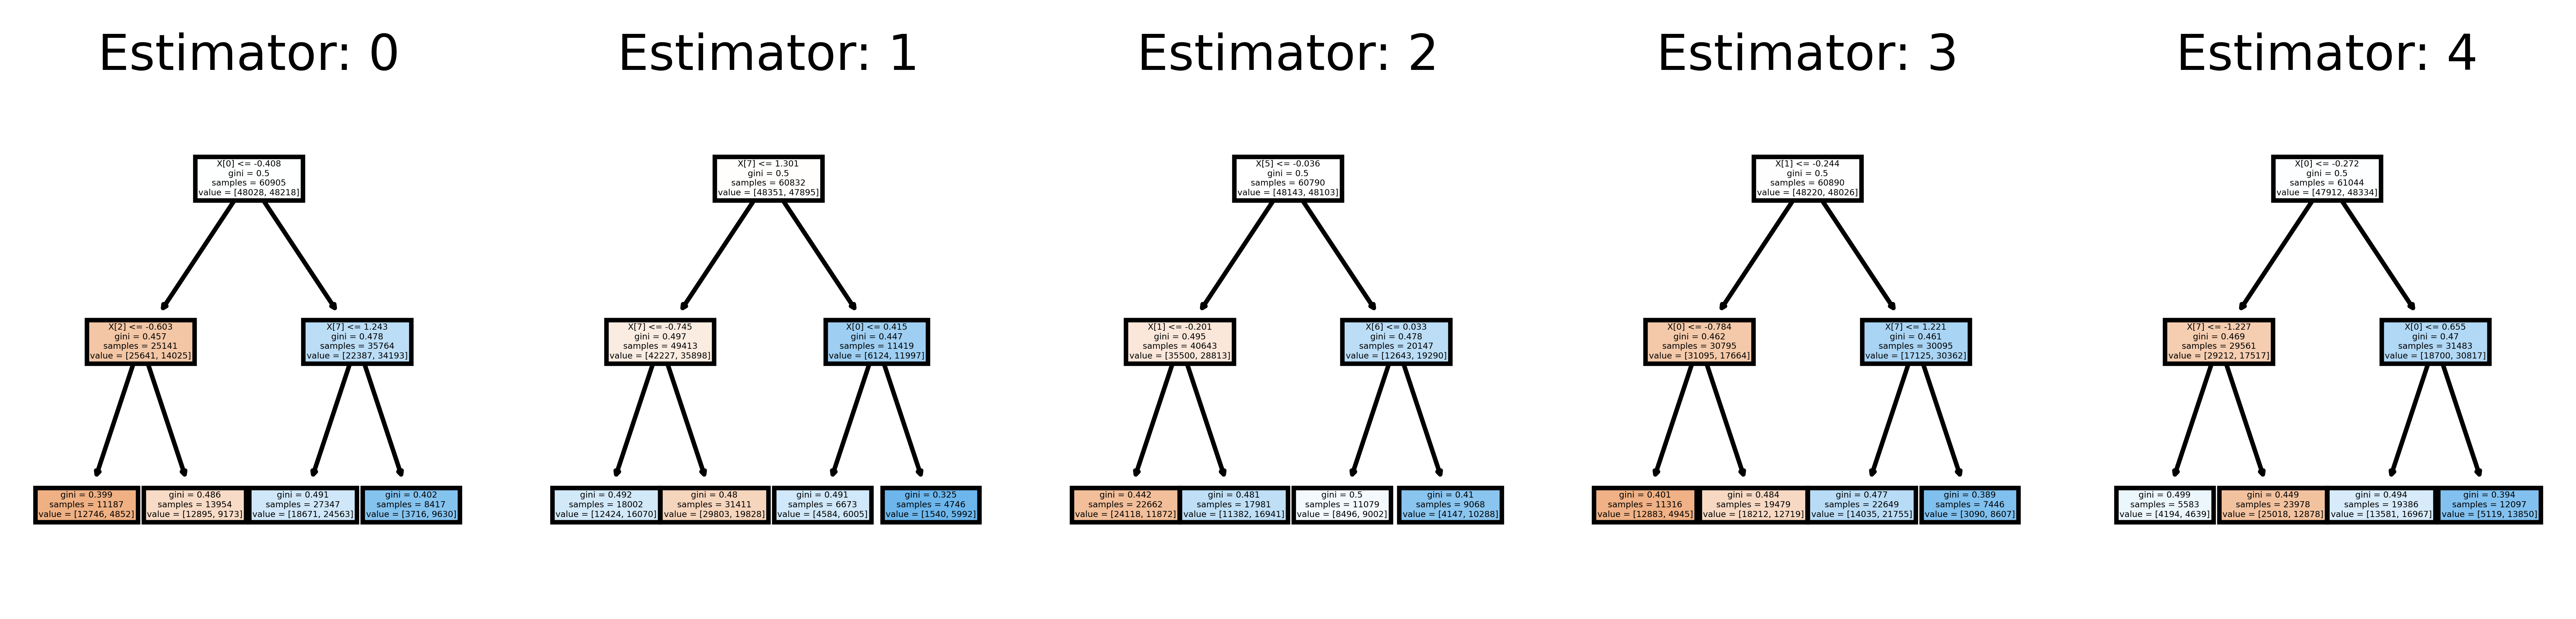

In [15]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

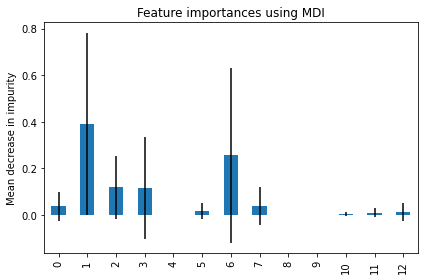

In [20]:
forest = models['concat']['rf']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()